### Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading Data

In [2]:
data = pd.read_csv('heart.csv')

### Exploring Data

In [3]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
data.tail()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0

In [5]:
data.shape

(1025, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [8]:
data['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

In [9]:
data['chol'].value_counts()

chol
204    21
234    21
197    19
212    18
254    17
       ..
164     3
394     3
215     3
160     3
141     3
Name: count, Length: 152, dtype: int64

In [10]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### Data Preprocessing

In [11]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

In [12]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### Data Visualisation and Questions

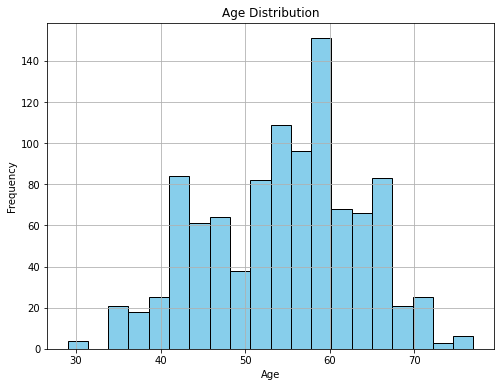

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


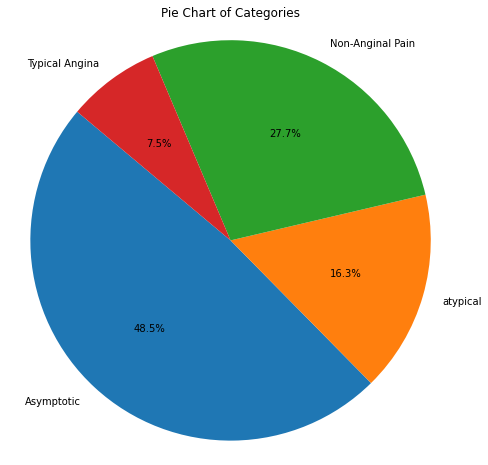

In [16]:
import matplotlib.pyplot as plt

# Data
categories = ['Asymptotic', 'atypical', 'Non-Anginal Pain', 'Typical Angina']
values = [497, 167, 284, 77]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


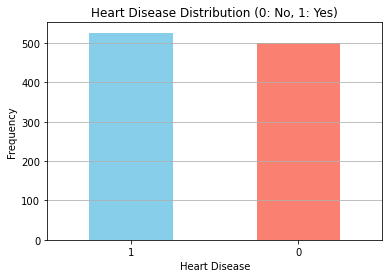

In [17]:
plt.figure(figsize=(6, 4))
data['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease Distribution (0: No, 1: Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [18]:
df=data

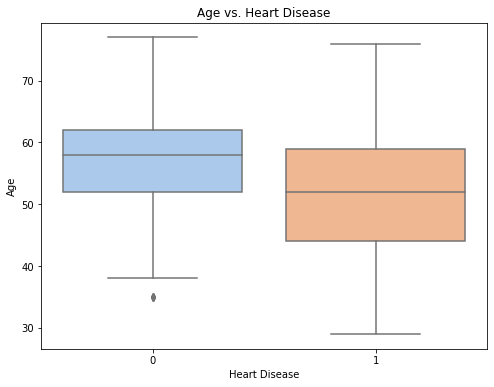

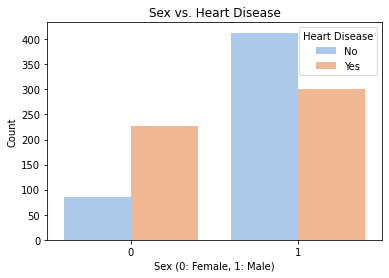

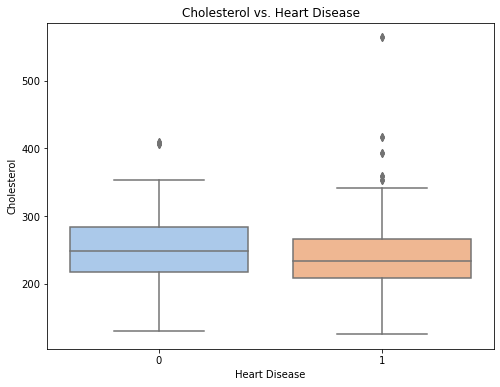

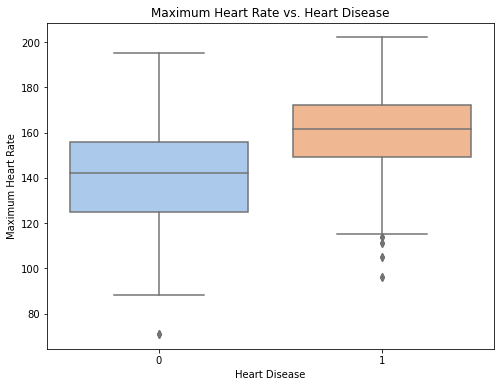

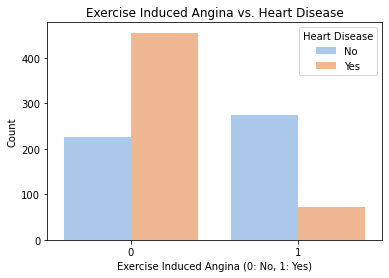

In [19]:


# Bivariate analysis between target and other variables
# Age vs. target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df, palette='pastel')
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.show()

# Sex vs. target
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='target', data=df, palette='pastel')
plt.title('Sex vs. Heart Disease')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Cholesterol vs. target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df, palette='pastel')
plt.title('Cholesterol vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol')
plt.show()

# Maximum heart rate vs. target
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='thalach', data=df, palette='pastel')
plt.title('Maximum Heart Rate vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Maximum Heart Rate')
plt.show()

# Exercise induced angina vs. target
plt.figure(figsize=(6, 4))
sns.countplot(x='exang', hue='target', data=df, palette='pastel')
plt.title('Exercise Induced Angina vs. Heart Disease')
plt.xlabel('Exercise Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()


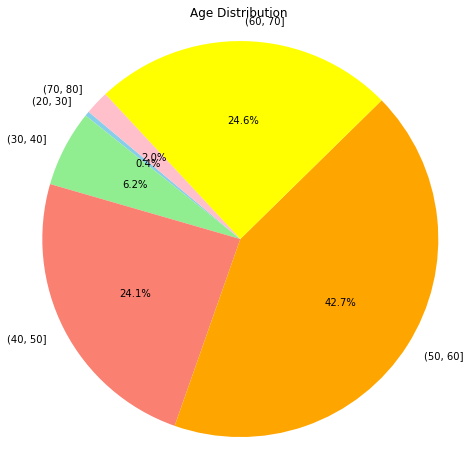

In [20]:
import matplotlib.pyplot as plt

# Calculate age group frequencies
bins = [20, 30, 40, 50, 60, 70, 80]
age_groups = pd.cut(df['age'], bins=bins)
age_group_counts = age_groups.value_counts().sort_index()

# Convert age group counts to percentages
age_group_percentages = (age_group_counts / age_group_counts.sum()) * 100

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_group_percentages, labels=age_group_percentages.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon', 'orange', 'yellow', 'pink'], startangle=140)
plt.title('Age Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



age less then 50 =  199
Age more then 50 =  327


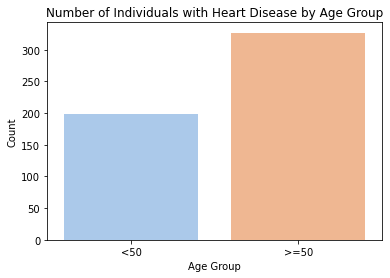

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for individuals with heart disease
heart_disease_data = data[data['target'] == 1]

# Create two age groups: less than 50 and more than 50
age_less_than_50 = heart_disease_data[heart_disease_data['age'] < 50]
age_more_than_50 = heart_disease_data[heart_disease_data['age'] >= 50]

# Count the number of individuals in each age group
count_less_than_50 = len(age_less_than_50)
print("age less then 50 = ",count_less_than_50)
count_more_than_50 = len(age_more_than_50)
print("Age more then 50 = ",count_more_than_50)

# Plot the count of individuals in each age group
plt.figure(figsize=(6, 4))
sns.barplot(x=['<50', '>=50'], y=[count_less_than_50, count_more_than_50], palette='pastel')
plt.title('Number of Individuals with Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


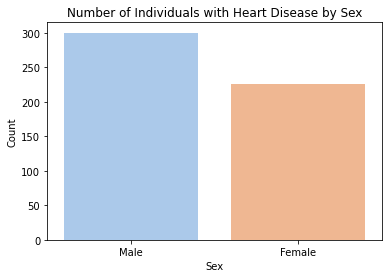

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for individuals with heart disease
heart_disease_data = data[data['target'] == 1]

# Count the number of individuals with heart disease by sex
count_male = len(heart_disease_data[heart_disease_data['sex'] == 1])  # Male (sex = 1)
count_female = len(heart_disease_data[heart_disease_data['sex'] == 0])  # Female (sex = 0)

# Plot the count of individuals with heart disease by sex
plt.figure(figsize=(6, 4))
sns.barplot(x=['Male', 'Female'], y=[count_male, count_female], palette='pastel')
plt.title('Number of Individuals with Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


In [23]:
# import numpy as np

# # Calculate quantiles to divide cholesterol into three parts
# chol_quantiles = data['chol'].quantile([0.33, 0.66])

# # Define bins based on quantiles
# bins = [0, chol_quantiles.iloc[0], chol_quantiles.iloc[1], np.inf]

# # Define labels for the three parts
# labels = ['Low', 'Medium', 'High']

# # Create a new column 'chol_category' to store the category of cholesterol level
# data['chol_category'] = pd.cut(data['chol'], bins=bins, labels=labels, include_lowest=True)

# # Visualize the distribution of cholesterol categories with respect to heart disease
# plt.figure(figsize=(8, 6))
# sns.countplot(x='chol_category', hue='target', data=data, palette='pastel', order=labels)
# plt.title('Cholesterol Level vs. Heart Disease')
# plt.xlabel('Cholesterol Level')
# plt.ylabel('Count')
# plt.legend(title='Heart Disease', labels=['No', 'Yes'])
# plt.show()
# 

In [24]:
# # Calculate counts for each category of cholesterol level
# chol_counts = data['chol_category'].value_counts()

# # Plot the counts as a pie chart
# plt.figure(figsize=(8, 6))
# plt.pie(chol_counts, labels=chol_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
# plt.title('Distribution of Cholesterol Level')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.show()


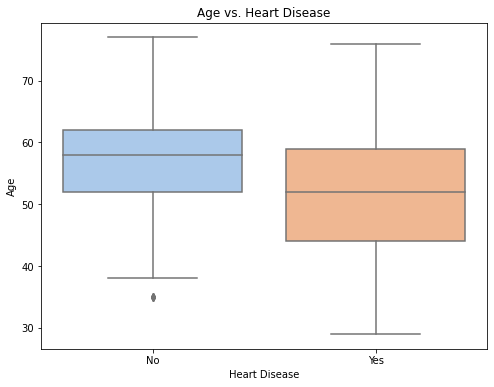

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df, palette='pastel')
plt.title('Age vs. Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Adjust x-axis labels
plt.show()


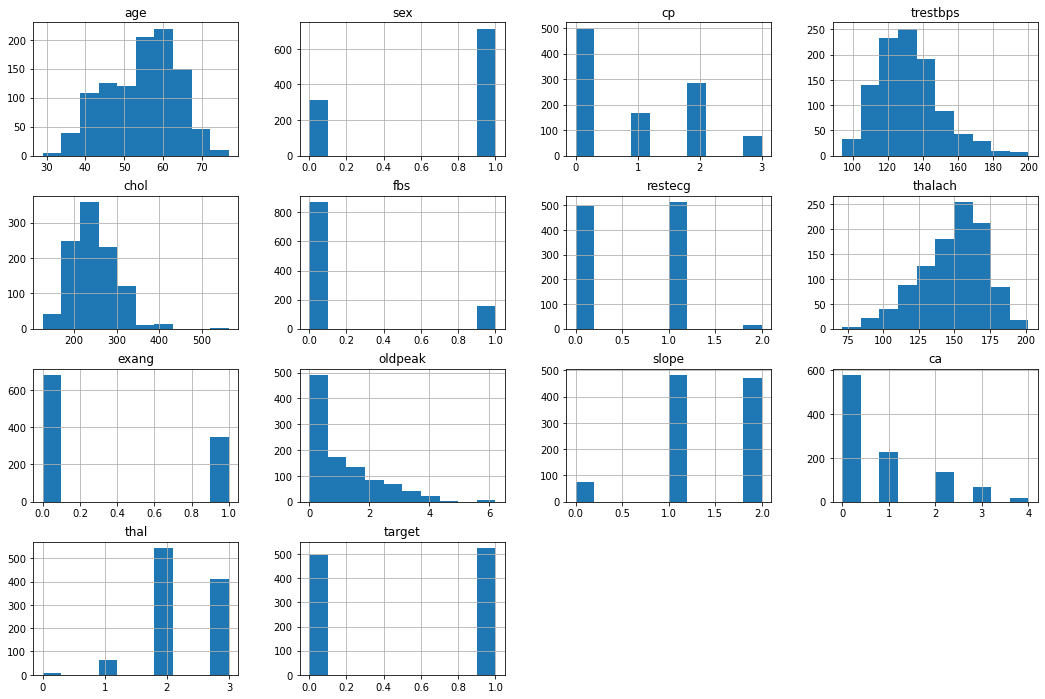

In [26]:
data.hist(figsize=(18,12))
plt.show()

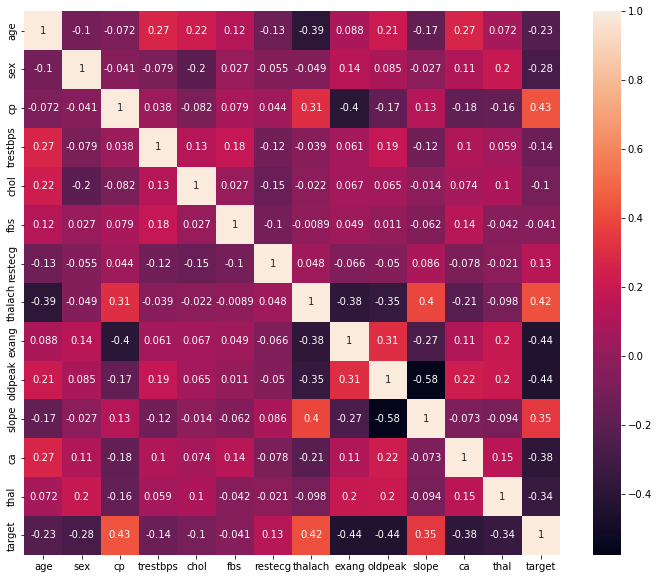

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Model Building

In [28]:
data1=data.copy()

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [30]:
data1.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# Seperating the target from the feature
X = data1.drop(columns=['target'],axis=1)
Y = data1['target']
# performing test train split with 70 -30 split ratio
X_train , X_test , Y_train ,Y_test = train_test_split(X , Y , test_size=0.3 , random_state=42)

In [33]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

717
308
717
308


### LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score

In [35]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,Y_train)     

LogisticRegression()

In [36]:
# Predictions
y_pred = reg.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, f1_score, mean_squared_error

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Training Score
print("Training Score:\n", reg.score(X_train, Y_train) * 100)

# Mean Squared Error
#print("Mean Squared Error:\n", mean_squared_error(Y_test, y_pred))

# F1 Score
print("F1 Score:\n", f1_score(Y_test, y_pred))

# Extract confusion matrix values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate True Positive Rate (Sensitivity)
sensitivity = TP / (TP + FN)
print("Sensitivity (True Positive Rate, TPR):\n", sensitivity)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)
#print("False Positive Rate (FPR):\n", FPR)

# Calculate Specificity (True Negative Rate, TNR)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate, TNR):\n", specificity)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       159
           1       0.77      0.87      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308

Confusion Matrix:
 [[121  38]
 [ 20 129]]
Training Score:
 86.75034867503487
F1 Score:
 0.8164556962025316
Sensitivity (True Positive Rate, TPR):
 0.8657718120805369
Specificity (True Negative Rate, TNR):
 0.7610062893081762


In [37]:
print(accuracy_score(Y_test,y_pred)*100)

81.16883116883116


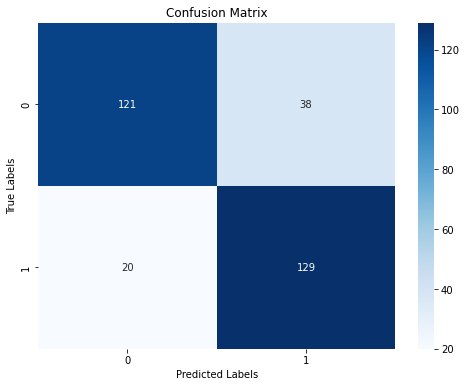

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [39]:
data2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
data2

Actual  Predicted
527       1          1
359       1          1
447       0          0
31        1          1
621       0          0
..      ...        ...
668       1          1
239       0          1
312       0          0
211       0          0
861       0          1

[308 rows x 2 columns]

# SVM

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

kernels = {'linear':0, 'poly':0 , 'rbf':0, 'sigmoid':0}
best=''
for i in kernels:
    svm = SVC(kernel=i)
    svm.fit(X_train,Y_train)
    yhat=svm.predict(X_test)
    kernels[i]=f1_score(Y_test,yhat,average='weighted')
    if kernels[i] == max(kernels.values()):
        best = i

svm=SVC(kernel=best)
svm.fit(X_train,Y_train)
svm_pred= svm.predict(X_test)
print(f'SVM f1_score kernel({best}) : {f1_score(Y_test, svm_pred, average="weighted")}')
        



SVM f1_score kernel(linear) : 0.8079745054666684


In [41]:
# Predictions
y_pred = svm.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, f1_score, mean_squared_error

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Training Score
print("Training Score:\n", svm.score(X_train, Y_train) * 100)

# Mean Squared Error
#print("Mean Squared Error:\n", mean_squared_error(Y_test, y_pred))

# F1 Score
print("F1 Score:\n", f1_score(Y_test, y_pred))

# Extract confusion matrix values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate True Positive Rate (Sensitivity)
sensitivity = TP / (TP + FN)
print("Sensitivity (True Positive Rate, TPR):\n", sensitivity)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)
#print("False Positive Rate (FPR):\n", FPR)

# Calculate Specificity (True Negative Rate, TNR)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate, TNR):\n", specificity)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       159
           1       0.76      0.87      0.82       149

    accuracy                           0.81       308
   macro avg       0.81      0.81      0.81       308
weighted avg       0.82      0.81      0.81       308

Confusion Matrix:
 [[119  40]
 [ 19 130]]
Training Score:
 86.33193863319386
F1 Score:
 0.8150470219435736
Sensitivity (True Positive Rate, TPR):
 0.87248322147651
Specificity (True Negative Rate, TNR):
 0.7484276729559748


In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix                                    
accuracy = accuracy_score(Y_test, svm_pred)
precision = precision_score(Y_test,svm_pred)
recall = recall_score(Y_test, svm_pred)
f1 = f1_score(Y_test, svm_pred)
#roc_auc = roc_auc_score(y_test, y_prob)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Test Accuracy: 0.81
Precision: 0.76
Recall: 0.87
F1 Score: 0.82


### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=4, random_state= 123 , criterion='entropy')

dtree.fit(X_train,
          Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=123)

In [44]:
# Predictions
y_pred = dtree.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, f1_score, mean_squared_error

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Training Score
print("Training Score:\n", dtree.score(X_train, Y_train) * 100)

# Mean Squared Error
#print("Mean Squared Error:\n", mean_squared_error(Y_test, y_pred))

# F1 Score
print("F1 Score:\n", f1_score(Y_test, y_pred))

# Extract confusion matrix values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate True Positive Rate (Sensitivity)
sensitivity = TP / (TP + FN)
print("Sensitivity (True Positive Rate, TPR):\n", sensitivity)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)
#print("False Positive Rate (FPR):\n", FPR)

# Calculate Specificity (True Negative Rate, TNR)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate, TNR):\n", specificity)
accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")




Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80       159
           1       0.75      0.92      0.83       149

    accuracy                           0.81       308
   macro avg       0.83      0.82      0.81       308
weighted avg       0.83      0.81      0.81       308

Confusion Matrix:
 [[113  46]
 [ 12 137]]
Training Score:
 86.61087866108787
F1 Score:
 0.8253012048192772
Sensitivity (True Positive Rate, TPR):
 0.9194630872483222
Specificity (True Negative Rate, TNR):
 0.710691823899371
Test Accuracy: 0.81


In [45]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix                                    
# accuracy = accuracy_score(Y_test, y_pred)
# precision = precision_score(Y_test,y_pred)
# recall = recall_score(Y_test, y_pred)
# f1 = f1_score(Y_test, y_pred)
# #roc_auc = roc_auc_score(y_test, y_prob)

# print(f"Test Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")

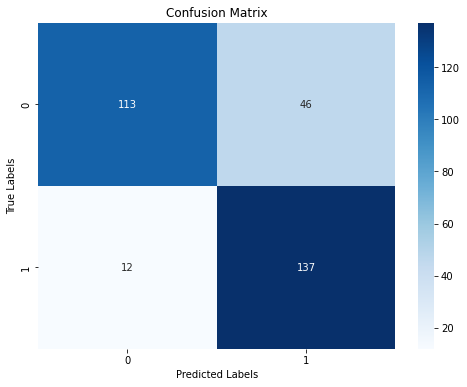

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [47]:
print(accuracy_score(Y_test,y_pred)*100)

81.16883116883116


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5)  # Adjust hyperparameters here
rfc.fit(X_train, Y_train)

y_pred2 = rfc.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score,f1_score
from sklearn.metrics import mean_squared_error

print("Classification Report is:\n", classification_report(Y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred2))
print("Training Score:\n", rfc.score(X_train, Y_train) * 100)
print("Mean Squared Error:\n", mean_squared_error(Y_test, y_pred2))
print("f1 score is:\n", f1_score(Y_test, y_pred2))


Classification Report is:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       159
           1       0.88      0.93      0.90       149

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308

Confusion Matrix:
 [[140  19]
 [ 11 138]]
Training Score:
 96.09483960948396
Mean Squared Error:
 0.09740259740259741
f1 score is:
 0.9019607843137255


In [49]:
# Predictions
y_pred = rfc.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, f1_score, mean_squared_error

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Training Score
print("Training Score:\n", rfc.score(X_train, Y_train) * 100)

# Mean Squared Error
#print("Mean Squared Error:\n", mean_squared_error(Y_test, y_pred))

# F1 Score
print("F1 Score:\n", f1_score(Y_test, y_pred))

# Extract confusion matrix values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate True Positive Rate (Sensitivity)
sensitivity = TP / (TP + FN)
print("Sensitivity (True Positive Rate, TPR):\n", sensitivity)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)
#print("False Positive Rate (FPR):\n", FPR)

# Calculate Specificity (True Negative Rate, TNR)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate, TNR):\n", specificity)


accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       159
           1       0.88      0.93      0.90       149

    accuracy                           0.90       308
   macro avg       0.90      0.90      0.90       308
weighted avg       0.90      0.90      0.90       308

Confusion Matrix:
 [[140  19]
 [ 11 138]]
Training Score:
 96.09483960948396
F1 Score:
 0.9019607843137255
Sensitivity (True Positive Rate, TPR):
 0.9261744966442953
Specificity (True Negative Rate, TNR):
 0.8805031446540881
Test Accuracy: 0.90


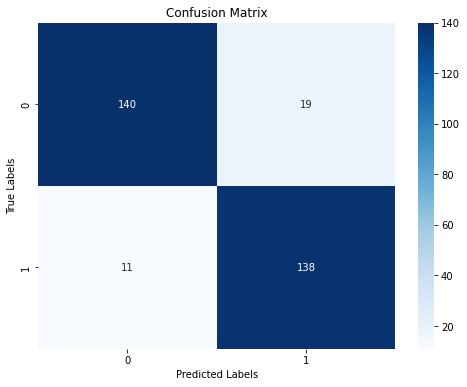

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [51]:
print(accuracy_score(Y_test,y_pred)*100)

90.25974025974025


### Gradient Boosting Classifier  

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [53]:
# Predictions
y_pred = gbc.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, f1_score, mean_squared_error

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Training Score
print("Training Score:\n", gbc.score(X_train, Y_train) * 100)

# Mean Squared Error
#print("Mean Squared Error:\n", mean_squared_error(Y_test, y_pred))

# F1 Score
print("F1 Score:\n", f1_score(Y_test, y_pred))

# Extract confusion matrix values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate True Positive Rate (Sensitivity)
sensitivity = TP / (TP + FN)
print("Sensitivity (True Positive Rate, TPR):\n", sensitivity)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)
#print("False Positive Rate (FPR):\n", FPR)

# Calculate Specificity (True Negative Rate, TNR)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate, TNR):\n", specificity)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.95      0.95      0.95       149

    accuracy                           0.95       308
   macro avg       0.95      0.95      0.95       308
weighted avg       0.95      0.95      0.95       308

Confusion Matrix:
 [[151   8]
 [  7 142]]
Training Score:
 98.74476987447699
F1 Score:
 0.9498327759197325
Sensitivity (True Positive Rate, TPR):
 0.9530201342281879
Specificity (True Negative Rate, TNR):
 0.949685534591195
Test Accuracy: 0.95


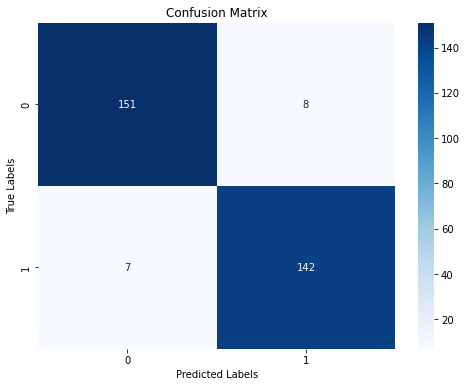

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [55]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix                                    
# accuracy = accuracy_score(Y_test, y_pred3)
# precision = precision_score(Y_test,y_pred3)
# recall = recall_score(Y_test, y_pred3)
# f1 = f1_score(Y_test, y_pred3)
# #roc_auc = roc_auc_score(y_test, y_prob)

# print(f"Test Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")

In [56]:
print(accuracy_score(Y_test,y_pred)*100)

95.12987012987013


In [57]:
gdc = GradientBoostingClassifier()
gdc.fit(X_train, Y_train)
y_prob_gdc = gdc.predict_proba(X_test)[:, 1]
roc_auc_gdc = roc_auc_score(Y_test, y_prob_gdc)
fpr_gdc, tpr_gdc, _ = roc_curve(Y_test, y_prob_gdc)

## ENSEMNLE 

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
# Create the Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('log_reg', reg),
    ('random_forest', rfc),
    ('gradient_boosting', gbc)
], voting='soft')  # 'hard' for majority voting, 'soft' for averaging probabilities

# Train the Voting Classifier
voting_clf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Compute and plot the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()


Test Accuracy: 0.89


In [59]:
# Predictions
y_pred = voting_clf.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, f1_score, mean_squared_error

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Training Score
print("Training Score:\n", voting_clf.score(X_train, Y_train) * 100)

# Mean Squared Error
#print("Mean Squared Error:\n", mean_squared_error(Y_test, y_pred))

# F1 Score
print("F1 Score:\n", f1_score(Y_test, y_pred))

# Extract confusion matrix values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate True Positive Rate (Sensitivity)
sensitivity = TP / (TP + FN)
print("Sensitivity (True Positive Rate, TPR):\n", sensitivity)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)
#print("False Positive Rate (FPR):\n", FPR)

# Calculate Specificity (True Negative Rate, TNR)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate, TNR):\n", specificity)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       159
           1       0.86      0.93      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.90      0.89      0.89       308

Confusion Matrix:
 [[137  22]
 [ 11 138]]
Training Score:
 95.25801952580196
F1 Score:
 0.8932038834951456
Sensitivity (True Positive Rate, TPR):
 0.9261744966442953
Specificity (True Negative Rate, TNR):
 0.8616352201257862
Test Accuracy: 0.89


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

y_pred = voting_clf.predict(X_test)                                          
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
#roc_auc = roc_auc_score(Y_test, y_prob_voting_clf)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
#print(f"roc: {roc_auc:.2f}")

Test Accuracy: 0.89
Precision: 0.86
Recall: 0.93
F1 Score: 0.89


In [61]:
y_prob_voting_clf = voting_clf.predict_proba(X_test)[:, 1]
roc_auc_voting_clf = roc_auc_score(Y_test, y_prob_voting_clf)
fpr_voting_clf, tpr_voting_clf, _ = roc_curve(Y_test, y_prob_voting_clf)


## KNN

In [62]:

from sklearn.neighbors import KNeighborsClassifier


In [63]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
y_prob_knn = knn.predict_proba(X_test)[:, 1]
roc_auc_knn = roc_auc_score(Y_test, y_prob_knn)
fpr_knn, tpr_knn, _ = roc_curve(Y_test, y_prob_knn)


In [64]:
# Predictions
y_pred = knn.predict(X_test)

# Import necessary metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score, f1_score, mean_squared_error

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Training Score
print("Training Score:\n", knn.score(X_train, Y_train) * 100)

# Mean Squared Error
#print("Mean Squared Error:\n", mean_squared_error(Y_test, y_pred))

# F1 Score
print("F1 Score:\n", f1_score(Y_test, y_pred))

# Extract confusion matrix values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Calculate True Positive Rate (Sensitivity)
sensitivity = TP / (TP + FN)
print("Sensitivity (True Positive Rate, TPR):\n", sensitivity)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)
#print("False Positive Rate (FPR):\n", FPR)

# Calculate Specificity (True Negative Rate, TNR)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate, TNR):\n", specificity)

accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       159
           1       0.69      0.73      0.71       149

    accuracy                           0.71       308
   macro avg       0.71      0.71      0.71       308
weighted avg       0.72      0.71      0.71       308

Confusion Matrix:
 [[111  48]
 [ 40 109]]
Training Score:
 87.72663877266388
F1 Score:
 0.7124183006535948
Sensitivity (True Positive Rate, TPR):
 0.7315436241610739
Specificity (True Negative Rate, TNR):
 0.6981132075471698
Test Accuracy: 0.71


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

y_pred = knn.predict(X_test)                                          
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
#roc_auc = roc_auc_score(Y_test, y_prob_voting_clf)

print(f"Test Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
#print(f"roc: {roc_auc:.2f}")

Test Accuracy: 0.71
Precision: 0.69
Recall: 0.73
F1 Score: 0.71


## ROC

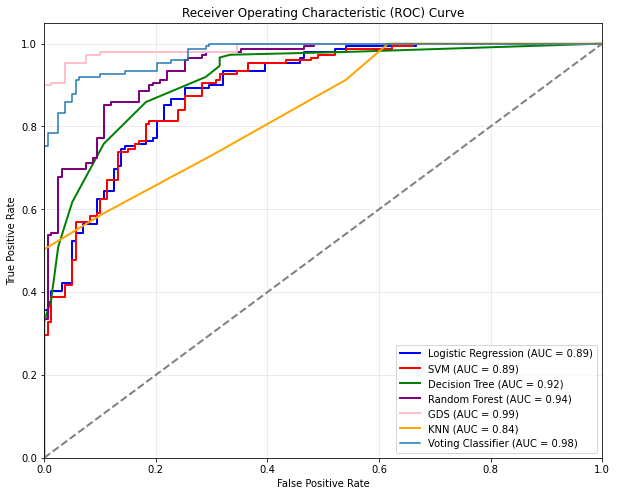

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Train and get predictions for Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_prob_lr = lr.predict_proba(X_test)[:, 1]
roc_auc_lr = roc_auc_score(Y_test, Y_prob_lr)
fpr_lr, tpr_lr, _ = roc_curve(Y_test, Y_prob_lr)

# Train and get predictions for SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, Y_train)
Y_prob_svm = svm.predict_proba(X_test)[:, 1]
roc_auc_svm = roc_auc_score(Y_test, Y_prob_svm)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_prob_svm)

# Train and get predictions for Decision Tree
dt = DecisionTreeClassifier(max_depth=4, random_state= 123 , criterion='entropy')
dt.fit(X_train, Y_train)
Y_prob_dt = dt.predict_proba(X_test)[:, 1]
roc_auc_dt = roc_auc_score(Y_test, Y_prob_dt)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, Y_prob_dt)

# Train and get predictions for Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=5)  # Adjust hyperparameters here
rf.fit(X_train, Y_train)
Y_prob_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(Y_test, Y_prob_rf)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_prob_rf)




# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gdc, tpr_gdc, color='pink', lw=2, label=f'GDS (AUC = {roc_auc_gdc:.2f})')
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_voting_clf, tpr_voting_clf, label=f'Voting Classifier (AUC = {roc_auc_voting_clf:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

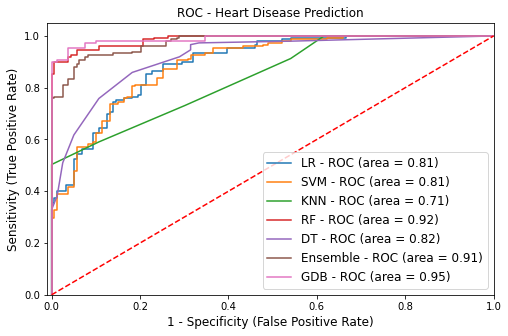

In [67]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': reg,
},

{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},

{
    'label': 'RF',
    'model': rfc,
},

{
    'label': 'DT',
    'model': dtree,
    
}, 
    {
    'label': 'Ensemble',
    'model': voting_clf,
        
    },
    
{
    'label': 'GDB',
    'model': gbc,
    
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, Y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(Y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Heart Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [68]:
import plotly.graph_objects as go

# Data for classifiers
classifiers = {
    'Random Forest': {'Specificity': 0.88, 'Sensitivity': 0.93, 'f1-score': 0.90, 'accuracy': 0.90},
    'KNN': {'Specificity': 0.70, 'Sensitivity': 0.73, 'f1-score': 0.71, 'accuracy': 0.71},
    'SVC': {'Specificity': 0.74, 'Sensitivity': 0.87, 'f1-score': 0.81, 'accuracy': 0.81},
    'Logistic Regression': {'Specificity': 0.76, 'Sensitivity': 0.87, 'f1-score': 0.82, 'accuracy': 0.81},
    'Decision Tree': {'Specificity': 0.71, 'Sensitivity': 0.91, 'f1-score': 0.83, 'accuracy': 0.81},
    'Ensemble': {'Specificity': 0.86, 'Sensitivity': 0.93, 'f1-score':0.90 , 'accuracy': 0.90},
    'Gradient Boosting': {'Specificity': 0.95, 'Sensitivity': 0.95, 'f1-score':0.95 , 'accuracy': 0.95}
}

classifier_names = list(classifiers.keys())
specificity = [classifiers[name]['Specificity'] for name in classifier_names]
sensitivity = [classifiers[name]['Sensitivity'] for name in classifier_names]
f1_score = [classifiers[name]['f1-score'] for name in classifier_names]
accuracy = [classifiers[name]['accuracy'] for name in classifier_names]

# Create a figure
fig = go.Figure()

# Add bars for each metric
fig.add_trace(go.Bar(x=classifier_names, y=specificity, name='Specificity'))
fig.add_trace(go.Bar(x=classifier_names, y=sensitivity, name='Sensitivity'))
fig.add_trace(go.Bar(x=classifier_names, y=f1_score, name='F1-Score'))
fig.add_trace(go.Bar(x=classifier_names, y=accuracy, name='Accuracy'))

# Update layout for better presentation
fig.update_layout(
    title='Performance Comparison of Classifiers',
    xaxis_title='Classifiers',
    yaxis_title='Score',
    barmode='group'
)

# Show plot
fig.show()


In [80]:
model=voting_clf

In [81]:
input=([[59,1,1,140,221,0,1,164,1,0.0,2,0,2]])

In [82]:
model.predict(input)

array([1], dtype=int64)

In [83]:
input1=([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

In [86]:
model.predict(input1)

array([0], dtype=int64)

In [87]:
import pickle as pk

In [89]:
pk.dump(model,open('Model.pkl','wb'))

In [ ]:
model=voting_clf